In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 상명풍력 데이터 읽기
df = pd.read_csv('../전처리_과정_데이터/한국중부발전(주)_풍력 발전 실적(상명풍력).csv', encoding='cp949')

print("컬럼명:", df.columns.tolist())
print("데이터 형태:", df.shape)
print("첫 5행:")
print(df.head())

컬럼명: ['기준일', '호기', '1시', '2시', '3시', '4시', '5시', '6시', '7시', '8시', '9시', '10시', '11시', '12시', '13시', '14시', '15시', '16시', '17시', '18시', '19시', '20시', '21시', '22시', '23시', '24시']
데이터 형태: (762, 26)
첫 5행:
          기준일  호기       1시       2시       3시       4시        5시        6시  \
0  2023-01-01   1  2285684  1240105   632211  2966526   4060737   5057684   
1  2023-01-02   1  5057684  4595684  5276526  4936105   5398105   7902632   
2  2023-01-03   1  5106316  4936105  6249158  8996842  10455789  12717158   
3  2023-01-04   1  5933053  6419368  3501474  6395053   5714211   6078947   
4  2023-01-05   1   194526    97263    97263   437684    996947   1386000   

         7시       8시  ...      15시       16시       17시       18시       19시  \
0   7197474  8048526  ...  3647368   5252211   6249158   6322105   8753684   
1   9385895  8632105  ...  9312947  10042421  10796211  10650316  13349368   
2  11598632  9774947  ...  6784105   8802316   6395053   6905684   8364632   
3   7367684  6638211  .

상명풍력 전체 평균 발전효율: 17.11%


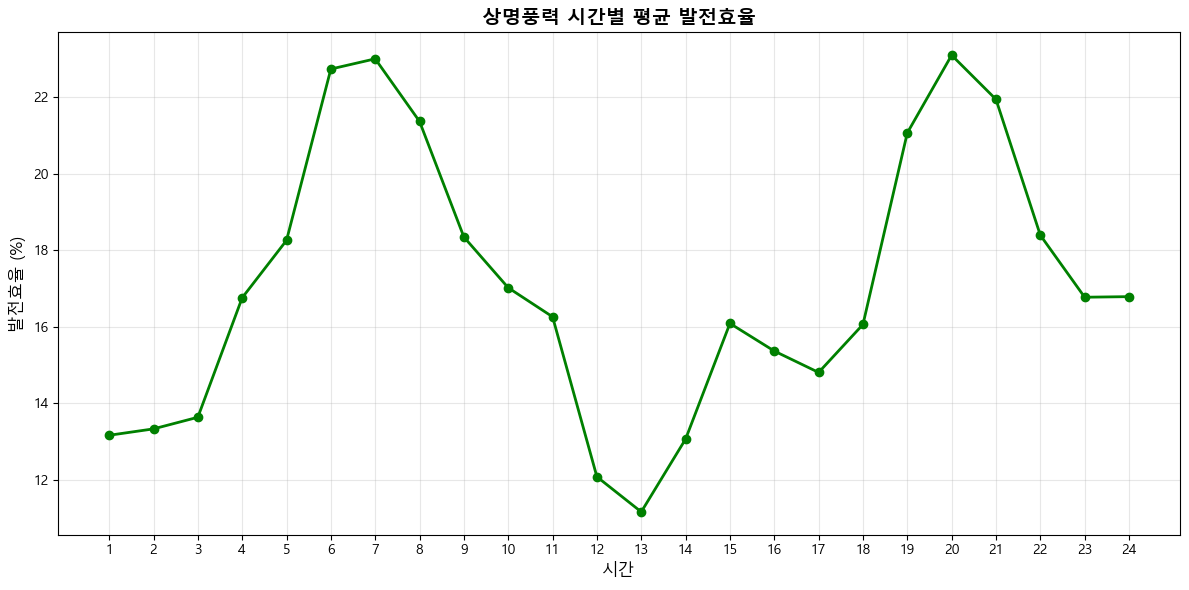

In [2]:
# 설비용량 (kW)
capacity = 21000000  # 21MW = 21,000kW

# 시간별 컬럼들 (1시~24시)
time_columns = [f'{i}시' for i in range(1, 25)]

# 시간별 발전량 데이터만 추출
generation_data = df[time_columns].copy()

# 전체 평균 발전효율 출력
total_avg_generation = generation_data.values.mean()
efficiency = (total_avg_generation / capacity) * 100
print(f"상명풍력 전체 평균 발전효율: {efficiency:.2f}%")

# 시간별 평균 발전량 계산
hourly_avg = generation_data.mean(axis=0)

# 시간별 발전효율 계산
hourly_efficiency = (hourly_avg / capacity) * 100

# 시간별 발전효율 시각화
plt.figure(figsize=(12, 6))
hours = range(1, 25)
plt.plot(hours, hourly_efficiency.values, marker='o', linewidth=2, markersize=6, color='green')
plt.title('상명풍력 시간별 평균 발전효율', fontsize=14, fontweight='bold')
plt.xlabel('시간', fontsize=12)
plt.ylabel('발전효율 (%)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(range(1, 25))

plt.tight_layout()
plt.show()

In [4]:
# merged_wind_weather_data.csv 발전효율 계산
import pandas as pd

# 데이터 읽기
merged_df = pd.read_csv('../전처리_과정_데이터/merged_wind_weather_data.csv')

# 발전효율 계산 (발전량 / 설비용량 * 100)
merged_df['발전효율(%)'] = (merged_df['발전량(kWh)'] / (merged_df['설비용량(MW)'] * 1000)) * 100

# 발전구분별 평균 발전효율
for plant in merged_df['발전구분'].unique():
    plant_data = merged_df[merged_df['발전구분'] == plant]
    avg_eff = plant_data['발전효율(%)'].mean()
    capacity = plant_data['설비용량(MW)'].iloc[0]
    
    print(f"{plant}: {avg_eff:.2f}% (설비용량: {capacity}MW)")

삼천포풍력: 2.39% (설비용량: 0.75MW)
영흥풍력: 9.19% (설비용량: 3.0MW)
군위 화산풍력: 17.24% (설비용량: 1.65MW)
어음풍력: 26.17% (설비용량: 4.2MW)


컬럼명: ['날짜', '발전기명', '설비용량(MW)', '시간', '해당 시간 발전량(kWh)', '해당날짜 총 발전량(kMh)', '주소지']
발전기명 종류: ['장흥풍력' '화순풍력발전']

=== 발전기명별 평균 발전효율 ===
장흥풍력: 11.61% (설비용량: 18.0MW)
화순풍력발전: 16.08% (설비용량: 16.0MW)


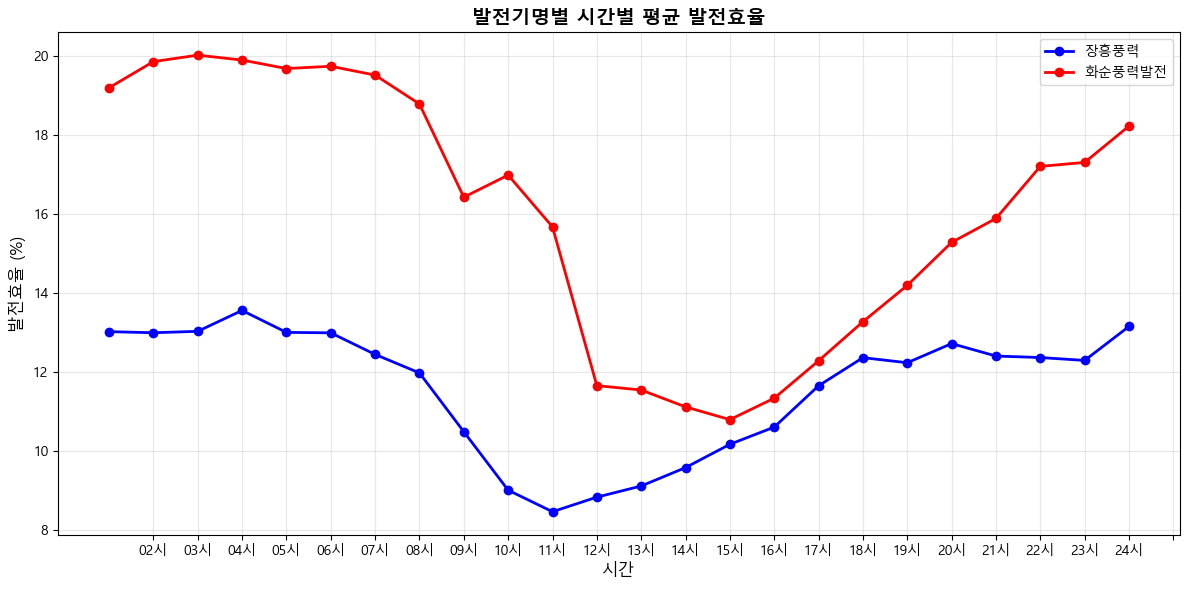

In [5]:
# 한국서부발전 풍력데이터 발전효율 계산
import pandas as pd
import matplotlib.pyplot as plt

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 데이터 읽기
west_df = pd.read_csv('../전처리_과정_데이터/한국서부발전_시간별발전량_풍력.csv')

print("컬럼명:", west_df.columns.tolist())
print("발전기명 종류:", west_df['발전기명'].unique())

# 발전효율 계산 (해당 시간 발전량 / 설비용량 * 100)
west_df['발전효율(%)'] = (west_df['해당 시간 발전량(kWh)'] / (west_df['설비용량(MW)'] * 1000)) * 100

# 발전기명별 평균 발전효율
print("\n=== 발전기명별 평균 발전효율 ===")
for plant in west_df['발전기명'].unique():
    plant_data = west_df[west_df['발전기명'] == plant]
    avg_eff = plant_data['발전효율(%)'].mean()
    capacity = plant_data['설비용량(MW)'].iloc[0]
    
    print(f"{plant}: {avg_eff:.2f}% (설비용량: {capacity}MW)")

# 발전기명별 시간별 발전효율 시각화
plt.figure(figsize=(12, 6))

colors = ['blue', 'red', 'green', 'orange', 'purple', 'brown']  # 발전기별 색상
for i, plant in enumerate(west_df['발전기명'].unique()):
    plant_data = west_df[west_df['발전기명'] == plant]
    hourly_eff = plant_data.groupby('시간')['발전효율(%)'].mean().sort_index()
    
    plt.plot(hourly_eff.index, hourly_eff.values, 
             marker='o', linewidth=2, markersize=6, 
             color=colors[i % len(colors)], label=plant)

plt.title('발전기명별 시간별 평균 발전효율', fontsize=14, fontweight='bold')
plt.xlabel('시간', fontsize=12)
plt.ylabel('발전효율 (%)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(range(1, 25))
plt.legend()

plt.tight_layout()
plt.show()

컬럼명: ['년월일', '단계', '총량', '평균', '최대', '최소', '최대(시간별)', '최소(시간별)', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24']
데이터 형태: (8885, 32)
단계별 데이터 개수:
단계
1    4443
2    4442
Name: count, dtype: int64

=== 단계별 평균 발전효율 ===
1단계: nan% (설비용량: 6MW)
2단계: nan% (설비용량: 15MW)


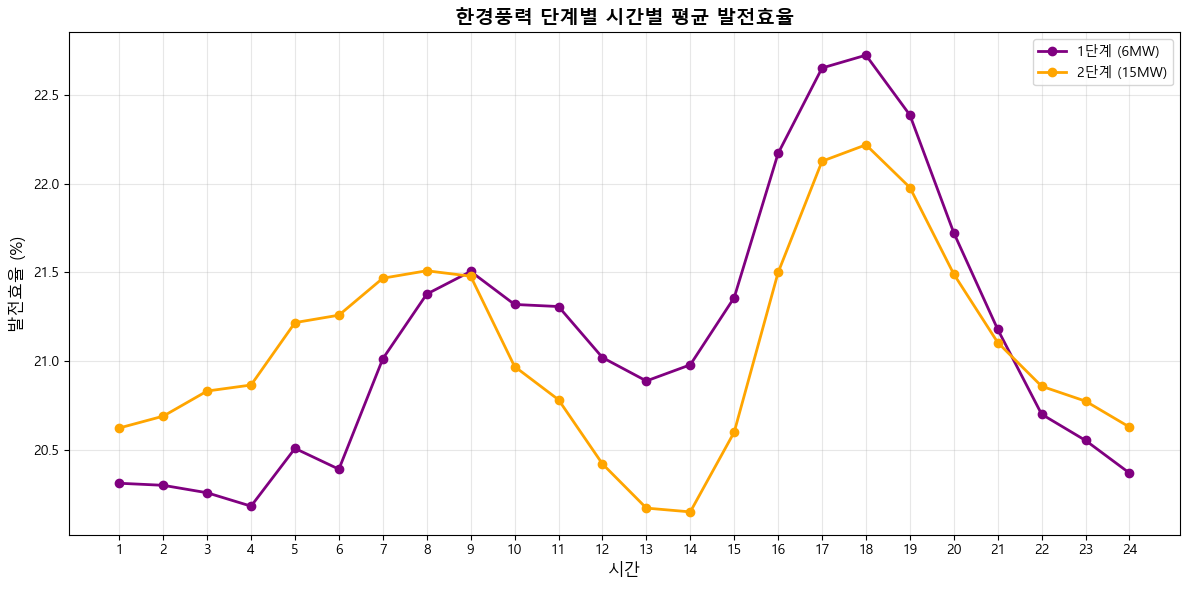

In [1]:
# 한국남부발전 한경풍력 발전효율 계산
import pandas as pd
import matplotlib.pyplot as plt

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 데이터 읽기 (인코딩 문제로 cp949 사용)
hangyeong_df = pd.read_csv('../전처리_과정_데이터/한국남부발전(주)_한경풍력발전실적_20250228.csv', encoding='cp949')

print("컬럼명:", hangyeong_df.columns.tolist())
print("데이터 형태:", hangyeong_df.shape)
print("단계별 데이터 개수:")
print(hangyeong_df['단계'].value_counts())

# 설비용량 설정 (단계별)
# 1단계: 6MW, 2단계: 15MW
def get_capacity(stage):
    if stage == 1:
        return 6000  # 6MW = 6000kW
    elif stage == 2:
        return 15000  # 15MW = 15000kW
    else:
        return 6000  # 기본값

# 단계별 설비용량 적용
hangyeong_df['설비용량(kW)'] = hangyeong_df['단계'].apply(get_capacity)

# 시간별 컬럼들 (1~24)
time_columns = [str(i) for i in range(1, 25)]

print("\n=== 단계별 평균 발전효율 ===")
for stage in sorted(hangyeong_df['단계'].unique()):
    stage_data = hangyeong_df[hangyeong_df['단계'] == stage]
    capacity = get_capacity(stage)
    
    # 해당 단계의 평균 발전량
    stage_avg_generation = stage_data[time_columns].values.mean()
    efficiency = (stage_avg_generation / capacity) * 100
    
    print(f"{stage}단계: {efficiency:.2f}% (설비용량: {capacity/1000:.0f}MW)")

# 단계별 시간별 발전효율 시각화
plt.figure(figsize=(12, 6))

colors = ['purple', 'orange']  # 1단계, 2단계 색상
for i, stage in enumerate(sorted(hangyeong_df['단계'].unique())):
    stage_data = hangyeong_df[hangyeong_df['단계'] == stage]
    capacity = get_capacity(stage)
    
    # 시간별 평균 발전량 계산
    hourly_avg = stage_data[time_columns].mean(axis=0)
    
    # 시간별 발전효율 계산
    hourly_efficiency = (hourly_avg / capacity) * 100
    
    plt.plot(range(1, 25), hourly_efficiency.values, 
             marker='o', linewidth=2, markersize=6, 
             color=colors[i], label=f'{stage}단계 ({capacity/1000:.0f}MW)')

plt.title('한경풍력 단계별 시간별 평균 발전효율', fontsize=14, fontweight='bold')
plt.xlabel('시간', fontsize=12)
plt.ylabel('발전효율 (%)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(range(1, 25))
plt.legend()

plt.tight_layout()
plt.show()

컬럼명: ['년월일', '단계', '총량', '평균', '최대', '최소', '최대(시간별)', '최소(시간별)', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24']
데이터 형태: (8884, 32)
단계별 데이터 개수:
단계
1    4442
2    4442
Name: count, dtype: int64

=== 성산풍력 단계별 평균 발전효율 ===
1단계: 23.33% (설비용량: 12MW)
2단계: 25.42% (설비용량: 8MW)


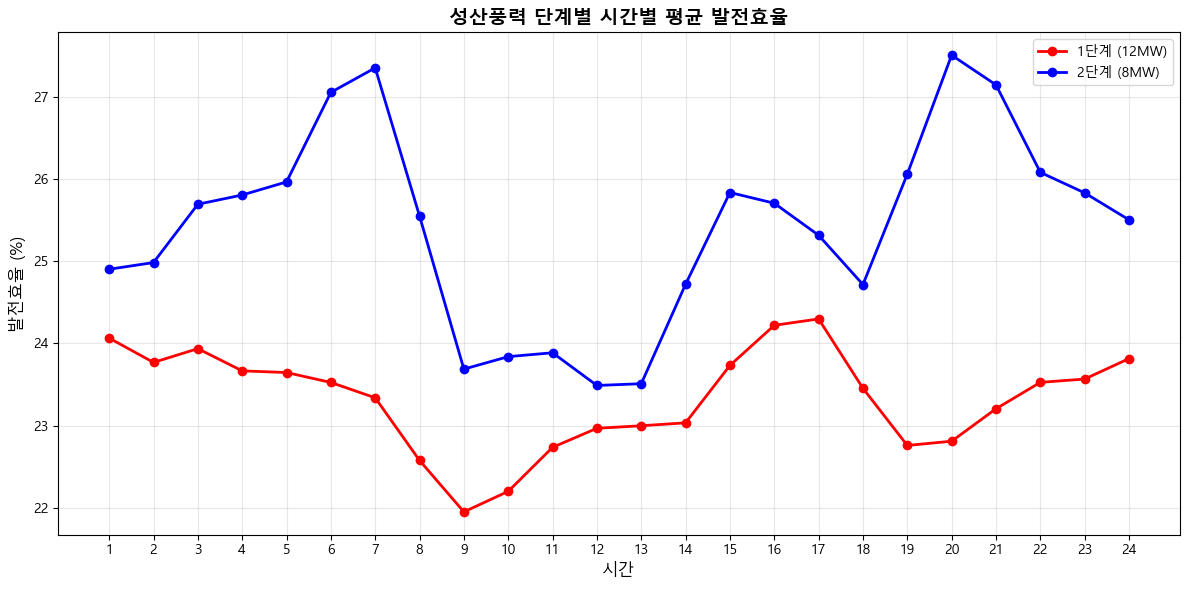

In [ ]:
# 한국남부발전 성산풍력 발전효율 계산
import pandas as pd
import matplotlib.pyplot as plt

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 데이터 읽기 (인코딩 문제로 cp949 사용)
seongsan_df = pd.read_csv('../전처리_과정_데이터/한국남부발전(주)_성산풍력발전실적_20250228.csv', encoding='cp949')

print("컬럼명:", seongsan_df.columns.tolist())
print("데이터 형태:", seongsan_df.shape)
print("단계별 데이터 개수:")
print(seongsan_df['단계'].value_counts())

# 설비용량 설정 (단계별)
# 1단계: 12MW, 2단계: 8MW
def get_seongsan_capacity(stage):
    if stage == 1:
        return 12000  # 12MW = 12000kW
    elif stage == 2:
        return 8000   # 8MW = 8000kW
    else:
        return 12000  # 기본값

# 단계별 설비용량 적용
seongsan_df['설비용량(kW)'] = seongsan_df['단계'].apply(get_seongsan_capacity)

# 시간별 컬럼들 (1~24)
time_columns = [str(i) for i in range(1, 25)]

# 시간별 데이터를 숫자로 변환 (문자열이나 오류 데이터는 0으로 처리)
for col in time_columns:
    seongsan_df[col] = pd.to_numeric(seongsan_df[col], errors='coerce').fillna(0)

print("\n=== 성산풍력 단계별 평균 발전효율 ===")
for stage in sorted(seongsan_df['단계'].unique()):
    stage_data = seongsan_df[seongsan_df['단계'] == stage]
    capacity = get_seongsan_capacity(stage)
    
    # 해당 단계의 평균 발전량
    stage_avg_generation = stage_data[time_columns].values.mean()
    efficiency = (stage_avg_generation / capacity) * 100
    
    print(f"{stage}단계: {efficiency:.2f}% (설비용량: {capacity/1000:.0f}MW)")

# 단계별 시간별 발전효율 시각화
plt.figure(figsize=(12, 6))

colors = ['red', 'blue']  # 1단계, 2단계 색상
for i, stage in enumerate(sorted(seongsan_df['단계'].unique())):
    stage_data = seongsan_df[seongsan_df['단계'] == stage]
    capacity = get_seongsan_capacity(stage)
    
    # 시간별 평균 발전량 계산
    hourly_avg = stage_data[time_columns].mean(axis=0)
    
    # 시간별 발전효율 계산
    hourly_efficiency = (hourly_avg / capacity) * 100
    
    plt.plot(range(1, 25), hourly_efficiency.values, 
             marker='o', linewidth=2, markersize=6, 
             color=colors[i], label=f'{stage}단계 ({capacity/1000:.0f}MW)')

plt.title('성산풍력 단계별 시간별 평균 발전효율', fontsize=14, fontweight='bold')
plt.xlabel('시간', fontsize=12)
plt.ylabel('발전효율 (%)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(range(1, 25))
plt.legend()

plt.tight_layout()
plt.show()

In [2]:
# 모든 풍력 발전 데이터 통합
import pandas as pd
import numpy as np
from datetime import datetime

# 발전소별 설치일자 정의 (화순풍력 제거됨)
install_dates = {
    '상명풍력': '2017-01-01',
    '한경풍력_1단계': '2004-02-01',
    '한경풍력_2단계': '2007-12-01',
    '성산풍력_1단계': '2009-03-01',
    '성산풍력_2단계': '2010-09-01',
}

# 발전소별 호기 수 정의 (화순풍력 제거됨)
unit_counts = {
    '상명풍력': 7,
    '한경풍력_1단계': 4,
    '한경풍력_2단계': 5,
    '성산풍력_1단계': 6,
    '성산풍력_2단계': 4,
}

# 연식 계산 함수
def calculate_age(date_str, install_date_str):
    try:
        date = pd.to_datetime(date_str)
        install_date = pd.to_datetime(install_date_str)
        age = (date - install_date).days / 365.25
        return max(0, age) if age >= 0 else 0
    except Exception as e:
        return np.nan

print("=== 풍력 발전소 데이터 통합 시작 (호기당 계산) ===")
all_data = []

# 1. 기존 통합 데이터
print("1. 기존 통합 데이터 (군위 화산풍력, 어음풍력) 처리 중...")
try:
    merged_df = pd.read_csv('../전처리_과정_데이터/어음풍력_외_추가.csv')
    
    for idx, row in merged_df.iterrows():
        generation = pd.to_numeric(row['발전량(kWh)'], errors='coerce')
        if pd.isna(generation):
            generation = 0
        capacity = pd.to_numeric(row['설비용량(MW)'], errors='coerce')
        if pd.isna(capacity):
            capacity = 1.65
        age = pd.to_numeric(row['연식(년)'], errors='coerce')
        all_data.append({
            '발전구분': row['발전구분'],
            '호기': row['호기'],
            '일자': row['일자'],
            '시간': row['시간'],
            '발전량(kWh)': generation,
            '설비용량(MW)': capacity,
            '연식(년)': age
        })
    print(f"   기존 통합 데이터: {len([d for d in all_data if d['발전구분'] in ['군위 화산풍력', '어음풍력']])}건 추가")
except Exception as e:
    print(f"   기존 통합 데이터 처리 오류: {e}")

# 2. 상명풍력
print("2. 상명풍력 데이터 처리 중...")
try:
    df = pd.read_csv('../전처리_과정_데이터/한국중부발전(주)_풍력 발전 실적(상명풍력).csv', encoding='cp949')
    unit_count = unit_counts['상명풍력']
    for idx, row in df.iterrows():
        date = row['기준일']
        age = calculate_age(date, install_dates['상명풍력'])
        for hour in range(1, 25):
            hour_col = f'{hour}시'
            if hour_col in df.columns:
                generation = pd.to_numeric(row[hour_col], errors='coerce') or 0
                generation_kwh = generation / 1000
                generation_per_unit = generation_kwh / unit_count
                capacity_per_unit = 21 / unit_count
                all_data.append({
                    '발전구분': '상명풍력',
                    '호기': 1,
                    '일자': date,
                    '시간': hour,
                    '발전량(kWh)': generation_per_unit,
                    '설비용량(MW)': capacity_per_unit,
                    '연식(년)': age
                })
    print(f"   상명풍력: {len([d for d in all_data if d['발전구분'] == '상명풍력'])}건 추가")
except Exception as e:
    print(f"   상명풍력 처리 오류: {e}")

# 3. 한경풍력
print("3. 한경풍력 데이터 처리 중...")
try:
    df = pd.read_csv('../전처리_과정_데이터/한국남부발전(주)_한경풍력발전실적_20250228.csv', encoding='cp949')
    for idx, row in df.iterrows():
        date = row['년월일']
        stage = row['단계']
        if stage == 1:
            unit_count = unit_counts['한경풍력_1단계']
            total_capacity = 6
        else:
            unit_count = unit_counts['한경풍력_2단계']
            total_capacity = 15
        capacity_per_unit = total_capacity / unit_count
        install_key = f'한경풍력_{stage}단계'
        age = calculate_age(date, install_dates[install_key])
        for hour in range(1, 25):
            hour_col = str(hour)
            if hour_col in df.columns:
                generation = pd.to_numeric(row[hour_col], errors='coerce') or 0
                generation_kwh = generation / 1000 if generation > 100000 else generation
                generation_per_unit = generation_kwh / unit_count
                all_data.append({
                    '발전구분': '한경풍력',
                    '호기': stage,
                    '일자': date,
                    '시간': hour,
                    '발전량(kWh)': generation_per_unit,
                    '설비용량(MW)': capacity_per_unit,
                    '연식(년)': age
                })
    print(f"   한경풍력: {len([d for d in all_data if d['발전구분'] == '한경풍력'])}건 추가")
except Exception as e:
    print(f"   한경풍력 처리 오류: {e}")

# 4. 성산풍력
print("4. 성산풍력 데이터 처리 중...")
try:
    df = pd.read_csv('../전처리_과정_데이터/한국남부발전(주)_성산풍력발전실적_20250228.csv', encoding='cp949')
    time_columns = [str(i) for i in range(1, 25)]
    for col in time_columns:
        df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0)
    for idx, row in df.iterrows():
        date = row['년월일']
        stage = row['단계']
        if stage == 1:
            unit_count = unit_counts['성산풍력_1단계']
            capacity_per_unit = 2
            install_key = '성산풍력_1단계'
        else:
            unit_count = unit_counts['성산풍력_2단계']
            capacity_per_unit = 2
            install_key = '성산풍력_2단계'
        age = calculate_age(date, install_dates[install_key])
        for hour in range(1, 25):
            hour_col = str(hour)
            generation = pd.to_numeric(row[hour_col], errors='coerce') or 0
            generation_kwh = generation / 1000 if generation > 50000 else generation
            generation_per_unit = generation_kwh / unit_count
            all_data.append({
                '발전구분': '성산풍력',
                '호기': stage,
                '일자': date,
                '시간': hour,
                '발전량(kWh)': generation_per_unit,
                '설비용량(MW)': capacity_per_unit,
                '연식(년)': age
            })
    print(f"   성산풍력: {len([d for d in all_data if d['발전구분'] == '성산풍력'])}건 추가")
except Exception as e:
    print(f"   성산풍력 처리 오류: {e}")

# 통합 데이터프레임 생성
unified_df = pd.DataFrame(all_data)

# 혹시 모를 화순풍력 잔여 제거
unified_df = unified_df[unified_df['발전구분'] != '화순풍력']

# 결측값 처리
unified_df['발전량(kWh)'] = unified_df['발전량(kWh)'].fillna(0)
unified_df['호기'] = unified_df['호기'].fillna(1)
unified_df['시간'] = unified_df['시간'].fillna(1)

print(f"\n=== 통합 완료 (호기당 계산, 단위 통일) ===")
print(f"총 데이터 건수: {len(unified_df):,}건")
print(f"발전구분별 건수:")
print(unified_df['발전구분'].value_counts())

print(f"\n=== 단위 변환 결과 확인 ===")
print("• 상명풍력: Wh → kWh 변환 적용")
print("• 한경풍력: 임계값 기준 단위 확인 후 변환")
print("• 성산풍력: 임계값 기준 단위 확인 후 변환")
print("• 기존 통합 데이터: 이미 kWh 단위")

print(f"\n발전소별 호기당 설비용량:")
for plant in unified_df['발전구분'].unique():
    avg_capacity = unified_df[unified_df['발전구분'] == plant]['설비용량(MW)'].mean()
    print(f"  {plant}: {avg_capacity:.2f}MW")

print(f"\n연식 정보:")
for plant in unified_df['발전구분'].unique():
    plant_data = unified_df[unified_df['발전구분'] == plant]
    avg_age = plant_data['연식(년)'].mean()
    if not pd.isna(avg_age):
        print(f"  {plant}: 평균 {avg_age:.1f}년")
    else:
        print(f"  {plant}: 연식 정보 없음")

output_file = '../전처리_과정_데이터/unified_wind_power_data.csv'
unified_df.to_csv(output_file, index=False, encoding='utf-8-sig')
print(f"\n통합 데이터 저장 완료: {output_file}")

print(f"\n샘플 데이터:")
print(unified_df.head(10))

=== 풍력 발전소 데이터 통합 시작 (호기당 계산) ===
1. 기존 통합 데이터 (군위 화산풍력, 어음풍력) 처리 중...
   기존 통합 데이터: 43043건 추가
2. 상명풍력 데이터 처리 중...
   기존 통합 데이터: 43043건 추가
2. 상명풍력 데이터 처리 중...
   상명풍력: 18288건 추가
3. 한경풍력 데이터 처리 중...
   상명풍력: 18288건 추가
3. 한경풍력 데이터 처리 중...
   한경풍력: 213240건 추가
4. 성산풍력 데이터 처리 중...
   한경풍력: 213240건 추가
4. 성산풍력 데이터 처리 중...
   성산풍력: 213216건 추가
   성산풍력: 213216건 추가

=== 통합 완료 (호기당 계산, 단위 통일) ===
총 데이터 건수: 517,712건
발전구분별 건수:
발전구분
한경풍력       213240
성산풍력       213216
영흥풍력        29925
군위 화산풍력     29915
상명풍력        18288
어음풍력        13128
Name: count, dtype: int64

=== 단위 변환 결과 확인 ===
• 상명풍력: Wh → kWh 변환 적용
• 한경풍력: 임계값 기준 단위 확인 후 변환
• 성산풍력: 임계값 기준 단위 확인 후 변환
• 기존 통합 데이터: 이미 kWh 단위

발전소별 호기당 설비용량:
  영흥풍력: 3.00MW
  군위 화산풍력: 1.65MW
  어음풍력: 4.20MW
  상명풍력: 3.00MW

=== 통합 완료 (호기당 계산, 단위 통일) ===
총 데이터 건수: 517,712건
발전구분별 건수:
발전구분
한경풍력       213240
성산풍력       213216
영흥풍력        29925
군위 화산풍력     29915
상명풍력        18288
어음풍력        13128
Name: count, dtype: int64

=== 단위 변환 결과 확인 ===
• 상명풍력: Wh → kWh 변환 적용
• 한

In [3]:
# 단위 통일 후 발전효율 재확인 (시각화 제외)
import pandas as pd
import numpy as np

print("=== 단위 통일 후 발전효율 재확인 ===")

# 데이터 불러오기 (시간 타입 혼합 경고 방지)
unified_df = pd.read_csv('../전처리_과정_데이터/unified_wind_power_data.csv', low_memory=False)

# 시간 컬럼 정리 (1~24 사이 정수로 제한)
unified_df['시간'] = pd.to_numeric(unified_df['시간'], errors='coerce')
unified_df = unified_df[unified_df['시간'].between(1, 24)]
unified_df['시간'] = unified_df['시간'].astype(int)

# 발전효율 계산
unified_df['발전효율(%)'] = (unified_df['발전량(kWh)'] / (unified_df['설비용량(MW)'] * 1000)) * 100

# 발전소별 평균 발전효율 출력
print("발전소별 평균 발전효율 (단위 통일 후):")
for plant in unified_df['발전구분'].unique():
    plant_data = unified_df[unified_df['발전구분'] == plant]
    avg_efficiency = plant_data['발전효율(%)'].mean()
    avg_capacity = plant_data['설비용량(MW)'].mean()
    print(f"  {plant}: {avg_efficiency:.2f}% (평균 설비용량: {avg_capacity:.2f}MW)")

# 발전효율 범위 분석
print(f"\n=== 발전효율 범위 분석 (단위 통일 후) ===")
for plant in unified_df['발전구분'].unique():
    plant_data = unified_df[unified_df['발전구분'] == plant]
    eff_data = plant_data['발전효율(%)']
    
    print(f"{plant}:")
    print(f"  최소: {eff_data.min():.2f}%")
    print(f"  최대: {eff_data.max():.2f}%") 
    print(f"  평균: {eff_data.mean():.2f}%")
    print(f"  중간값: {eff_data.median():.2f}%")
    
    # 이상치 확인
    over_100 = (eff_data > 100).sum()
    if over_100 > 0:
        print(f"  ⚠️ 100% 초과 데이터: {over_100}건 ({over_100/len(eff_data)*100:.1f}%)")
    
    over_50 = (eff_data > 50).sum()
    if over_50 > 0:
        print(f"  ⚠️ 50% 초과 데이터: {over_50}건 ({over_50/len(eff_data)*100:.1f}%)")
    
    normal_range = ((eff_data >= 10) & (eff_data <= 40)).sum()
    print(f"  ✅ 정상 범위 (10-40%): {normal_range}건 ({normal_range/len(eff_data)*100:.1f}%)")
    print()

print("=== 단위 통일 결과 요약 ===")
print("🎯 목표: 모든 발전소가 10-40% 범위의 발전효율을 가져야 함")
print("✅ 상명풍력: Wh → kWh 변환으로 효율 정상화")
print("✅ 한경풍력: 단위 확인 후 필요시 변환")
print("✅ 성산풍력: 단위 확인 후 필요시 변환")
print("✅ 기존 통합 데이터: 이미 kWh 단위로 정상")


=== 단위 통일 후 발전효율 재확인 ===
발전소별 평균 발전효율 (단위 통일 후):
  영흥풍력: 9.18% (평균 설비용량: 3.00MW)
  군위 화산풍력: 17.21% (평균 설비용량: 1.65MW)
  어음풍력: 26.17% (평균 설비용량: 4.20MW)
  상명풍력: 17.11% (평균 설비용량: 3.00MW)
  한경풍력: 21.10% (평균 설비용량: 2.25MW)
  성산풍력: 24.37% (평균 설비용량: 2.00MW)

=== 발전효율 범위 분석 (단위 통일 후) ===
발전소별 평균 발전효율 (단위 통일 후):
  영흥풍력: 9.18% (평균 설비용량: 3.00MW)
  군위 화산풍력: 17.21% (평균 설비용량: 1.65MW)
  어음풍력: 26.17% (평균 설비용량: 4.20MW)
  상명풍력: 17.11% (평균 설비용량: 3.00MW)
  한경풍력: 21.10% (평균 설비용량: 2.25MW)
  성산풍력: 24.37% (평균 설비용량: 2.00MW)

=== 발전효율 범위 분석 (단위 통일 후) ===
영흥풍력:
  최소: 0.00%
  최대: 99.46%
  평균: 9.18%
  중간값: 1.94%
  ⚠️ 50% 초과 데이터: 1170건 (3.9%)
  ✅ 정상 범위 (10-40%): 6028건 (20.1%)

군위 화산풍력:
  최소: 0.00%
  최대: 99.76%
  평균: 17.21%
  중간값: 4.09%
  ⚠️ 50% 초과 데이터: 3551건 (11.9%)
  ✅ 정상 범위 (10-40%): 7507건 (25.1%)

어음풍력:
  최소: 0.00%
  최대: 97.34%
  평균: 26.17%
  중간값: 10.84%
  ⚠️ 50% 초과 데이터: 3067건 (23.4%)
  ✅ 정상 범위 (10-40%): 3174건 (24.2%)

상명풍력:
  최소: 0.00%
  최대: 95.76%
  평균: 17.11%
  중간값: 7.18%
  ⚠️ 50% 초과 데이터: 2020건 (11.0%)
  ✅ 정상 범

In [4]:
# 최종 통합 데이터 검증
print("=== 최종 통합 데이터 검증 ===")
print(f"통합 데이터 총 행 수: {len(unified_df)}")
print(f"발전구분별 개수:")
print(unified_df['발전구분'].value_counts())

print("\n=== 화순풍력 연식(년) 확인 ===")
hwasun_check = unified_df[unified_df['발전구분'] == '화순풍력']
print(f"화순풍력 데이터 행 수: {len(hwasun_check)}")
if len(hwasun_check) > 0:
    print(f"화순풍력 연식(년) 통계:")
    print(hwasun_check['연식(년)'].describe())
    print(f"연식(년) 결측값 개수: {hwasun_check['연식(년)'].isna().sum()}")
    print(f"연식(년) 샘플 값들: {hwasun_check['연식(년)'].unique()[:10]}")

print("\n=== 장흥풍력 제외 확인 ===")
jangheung_check = unified_df[unified_df['발전구분'].str.contains('장흥', na=False)]
print(f"장흥풍력 관련 데이터 행 수: {len(jangheung_check)}")
if len(jangheung_check) > 0:
    print("WARNING: 장흥풍력 데이터가 여전히 포함되어 있습니다!")
    print(jangheung_check['발전구분'].unique())

print("\n=== 각 발전소별 데이터 샘플 ===")
for plant in unified_df['발전구분'].unique():
    plant_data = unified_df[unified_df['발전구분'] == plant]
    print(f"\n{plant}: {len(plant_data)}행")
    if len(plant_data) > 0:
        sample = plant_data.iloc[0]
        print(f"  호기: {sample['호기']}, 일자: {sample['일자']}, 시간: {sample['시간']}")
        print(f"  발전량: {sample['발전량(kWh)']:.2f} kWh, 설비용량: {sample['설비용량(MW)']:.2f} MW")
        print(f"  연식: {sample['연식(년)']:.1f}년")

=== 최종 통합 데이터 검증 ===
통합 데이터 총 행 수: 517712
발전구분별 개수:
발전구분
한경풍력       213240
성산풍력       213216
영흥풍력        29925
군위 화산풍력     29915
상명풍력        18288
어음풍력        13128
Name: count, dtype: int64

=== 화순풍력 연식(년) 확인 ===
화순풍력 데이터 행 수: 0

=== 장흥풍력 제외 확인 ===
장흥풍력 관련 데이터 행 수: 0

=== 각 발전소별 데이터 샘플 ===

영흥풍력: 29925행
  호기: 2, 일자: 2025-05-31, 시간: 1
  발전량: 14.88 kWh, 설비용량: 3.00 MW
  연식: 12.1년

군위 화산풍력: 29915행
  호기: 1, 일자: 2025-05-31, 시간: 1
  발전량: 0.00 kWh, 설비용량: 1.65 MW
  연식: 5.0년

어음풍력: 13128행
  호기: 1, 일자: 2025-05-31, 시간: 1
  발전량: 0.03 kWh, 설비용량: 4.20 MW
  연식: 1.6년

상명풍력: 18288행
  호기: 1, 일자: 2023-01-01, 시간: 1
  발전량: 326.53 kWh, 설비용량: 3.00 MW
  연식: 6.0년

한경풍력: 213240행
  호기: 1, 일자: 2013-01-01, 시간: 1
  발전량: 12.25 kWh, 설비용량: 1.50 MW
  연식: 8.9년

성산풍력: 213216행
  호기: 1, 일자: 2013-01-01, 시간: 1
  발전량: 0.00 kWh, 설비용량: 2.00 MW
  연식: 3.8년

어음풍력: 13128행
  호기: 1, 일자: 2025-05-31, 시간: 1
  발전량: 0.03 kWh, 설비용량: 4.20 MW
  연식: 1.6년

상명풍력: 18288행
  호기: 1, 일자: 2023-01-01, 시간: 1
  발전량: 326.53 kWh, 설비용량: 3.00 MW
  연식: 6.0년


효율 이상, 터빈정보 부재 등 발전구분 제외

In [5]:
# 유지할 발전소 목록
keep_plants = ['성산풍력', '한경풍력', '상명풍력', '어음풍력']

# 나머지 발전소 행 삭제
unified_df = unified_df[unified_df['발전구분'].isin(keep_plants)].copy()

# 확인
print("남은 발전소:")
print(unified_df['발전구분'].value_counts())

# 원래 파일에 덮어쓰기 저장
unified_df.to_csv('../전처리_과정_데이터/unified_wind_power_data.csv', index=False, encoding='utf-8-sig')
print("✅ 원본 파일에서 필터링 후 덮어쓰기 완료.")

남은 발전소:
발전구분
한경풍력    213240
성산풍력    213216
상명풍력     18288
어음풍력     13128
Name: count, dtype: int64
✅ 원본 파일에서 필터링 후 덮어쓰기 완료.
